In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# Define paths
dataset_dir = 'tea sickness dataset'  # Replace with your dataset path
img_height, img_width = 150, 150  # Image dimensions
batch_size = 32
epochs = 20

In [4]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data for validation
)

In [5]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use for training
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use for validation
)

Found 711 images belonging to 8 classes.
Found 174 images belonging to 8 classes.


In [6]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 113s 5s/step - accuracy: 0.1280 - loss: 2.4292 - val_accuracy: 0.3688 - val_loss: 1.5005
Epoch 2/20
 1/22 ━━━━━━━━━━━━━━━━━━━━ 10s 484ms/step - accuracy: 0.4375 - loss: 1.3477

c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 998ms/step - accuracy: 0.4375 - loss: 1.3477 - val_accuracy: 0.3812 - val_loss: 1.4353
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.3259 - loss: 1.4840 - val_accuracy: 0.4313 - val_loss: 1.2603
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 501ms/step - accuracy: 0.3750 - loss: 1.3755 - val_accuracy: 0.4938 - val_loss: 1.2615
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.4531 - loss: 1.2150 - val_accuracy: 0.5125 - val_loss: 1.3537
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.2812 - loss: 1.3083 - val_accuracy: 0.5250 - val_loss: 1.2497
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 111s 5s/step - accuracy: 0.4071 - loss: 1.2499 - val_accuracy: 0.4625 - val_loss: 1.2178
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6250 - loss: 1.0641 - val_accuracy: 0.4812 - val_loss: 1.1637
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 125s 6s/step - accuracy: 0.4905 - loss: 1.1023 - val_accuracy: 0.4563 - val_loss: 1.

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6336 - loss: 1.0744
Test Accuracy: 62.64%


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('tea sickness dataset'):
    print(dirname)

tea sickness dataset
tea sickness dataset\algal leaf
tea sickness dataset\Anthracnose
tea sickness dataset\bird eye spot
tea sickness dataset\brown blight
tea sickness dataset\gray light
tea sickness dataset\healthy
tea sickness dataset\red leaf spot
tea sickness dataset\white spot


In [12]:
import tensorflow as tf

path='tea sickness dataset'

train,test = tf.keras.utils.image_dataset_from_directory(
    path,
    label_mode="categorical",
    validation_split=0.2,
    subset="both",
    seed=42,
    batch_size=32,
    image_size=(300, 300),
)

# Extract class names
class_names = train.class_names

train=train.cache().prefetch(1).shuffle(100)
test=test.cache().prefetch(1)

Found 885 files belonging to 8 classes.
Using 708 files for training.
Using 177 files for validation.


In [4]:
from tensorflow.keras.applications import EfficientNetV2B3

base_model = EfficientNetV2B3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))
base_model.trainable = False

x = base_model.output
x = tf.keras.layers.Flatten()(x)  # Global average pooling to reduce spatial dimensions
x = tf.keras.layers.Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = tf.keras.layers.Dense(8, activation='softmax')(x)  # Output layer for 8 classes

# Create the final model
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

In [5]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [6]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

es=EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    verbose=1,
    mode='auto',
    restore_best_weights=True,
)
lr=ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=5,
    verbose=1,
    mode='auto',
    min_lr=1e-10,
)

In [7]:
model.fit(
    train,
    epochs=10,
    validation_data=test,
    callbacks=[es,lr]
)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.3784 - loss: 58.1872 - val_accuracy: 0.7571 - val_loss: 4.8719 - learning_rate: 0.0010
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8239 - loss: 2.3272 - val_accuracy: 0.8079 - val_loss: 3.1140 - learning_rate: 0.0010
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.8811 - loss: 1.4050 - val_accuracy: 0.8192 - val_loss: 3.5856 - learning_rate: 0.0010
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step - accuracy: 0.8978 - loss: 0.9092 - val_accuracy: 0.8249 - val_loss: 1.8368 - learning_rate: 0.0010
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.9327 - loss: 0.3993 - val_accuracy: 0.8362 - val_loss: 2.0772 - learning_rate: 0.0010
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 104s 5s/step - accuracy: 0.9534 - loss: 0.5400 - val_accuracy: 0.8136 - val_loss: 2.9403 - learning_rate: 0.0010
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 119s 5s/step - accuracy: 0.9720 - loss: 0.2088 - val_accu

6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step 


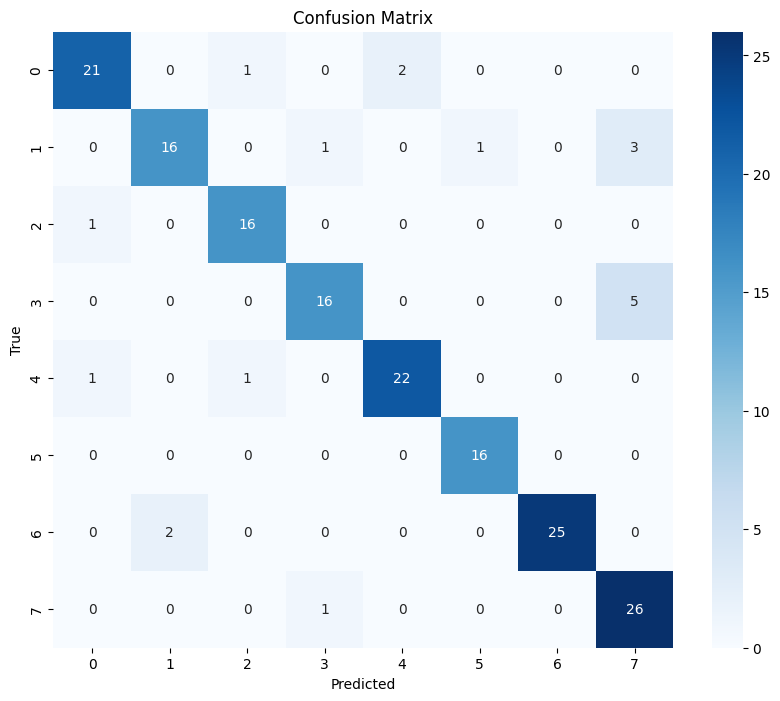

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = model.predict(test)
y_pred_classes = np.argmax(y_pred, axis=1)


y_true = []
for images, labels in test:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
y_true = np.array(y_true)


cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [9]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 888ms/step - accuracy: 0.9053 - loss: 1.9839
Test Accuracy: 89.27%


In [10]:
# Save the model
model.save('tea_disease_efficientnet_model.h5')
print("Model saved as tea_disease_efficientnet_model.h5")

Model saved as tea_disease_efficientnet_model.h5


In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
loaded_model = load_model('tea_disease_efficientnet_model.h5')

# Function to preprocess the image
def preprocess_image(img_path, target_size=(300, 300)):
    img = image.load_img(img_path, target_size=target_size)  # Load and resize the image
    img_array = image.img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    return img_array

# Function to predict the class of an image
def predict_image_class(img_path, model):
    preprocessed_img = preprocess_image(img_path)
    predictions = model.predict(preprocessed_img)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get the predicted class index
    confidence = np.max(predictions)  # Get the confidence score
    return predicted_class, confidence

# Test with a new image
new_image_path = 'IMG_20220503_143639.jpg'  # Replace with the path to your test image
predicted_class, confidence = predict_image_class(new_image_path, loaded_model)

# Map class index to class name
predicted_class_name = class_names[predicted_class]

print(f"Predicted Class: {predicted_class_name}")
print(f"Confidence: {confidence * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted Class: healthy
Confidence: 100.00%


In [15]:
import numpy as np

# Save class_names to a file
np.save('class_names.npy', class_names)